# Predicción del Precio de una Casa

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargamos los datos
df = pd.read_csv('./../house_train_raw.csv')

# Análisis Exploratorio

In [279]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [280]:
# información general sobre el dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [281]:
# Columnas
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [282]:
# Comprobamos si existen registros duplicados
df[df.duplicated()==True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [283]:
# Comprobamos si existen Ids duplicados
df.shape[0]-len(set(df.Id))

0

In [3]:
#borramos la columna Id, no es relevante
df.drop(['Id'], axis=1, inplace=True)

Veamos la distribución de los precios

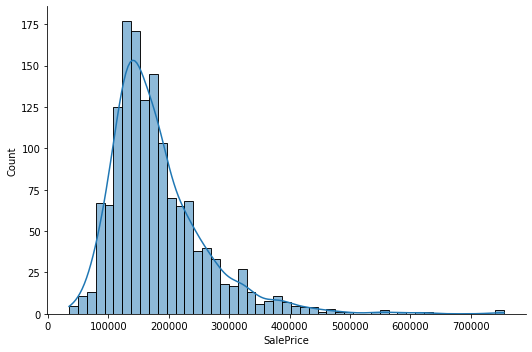

In [286]:
# Visualizamos la distribución de los precios
sns.displot(data=df,x='SalePrice', kde=True, height=5, aspect=1.5)

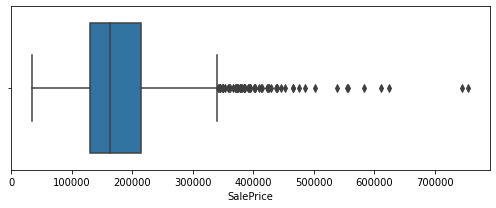

In [287]:
fig = plt.figure(figsize=(7,3))
sns.boxplot(data=df, x='SalePrice')
plt.tight_layout()

Correlación

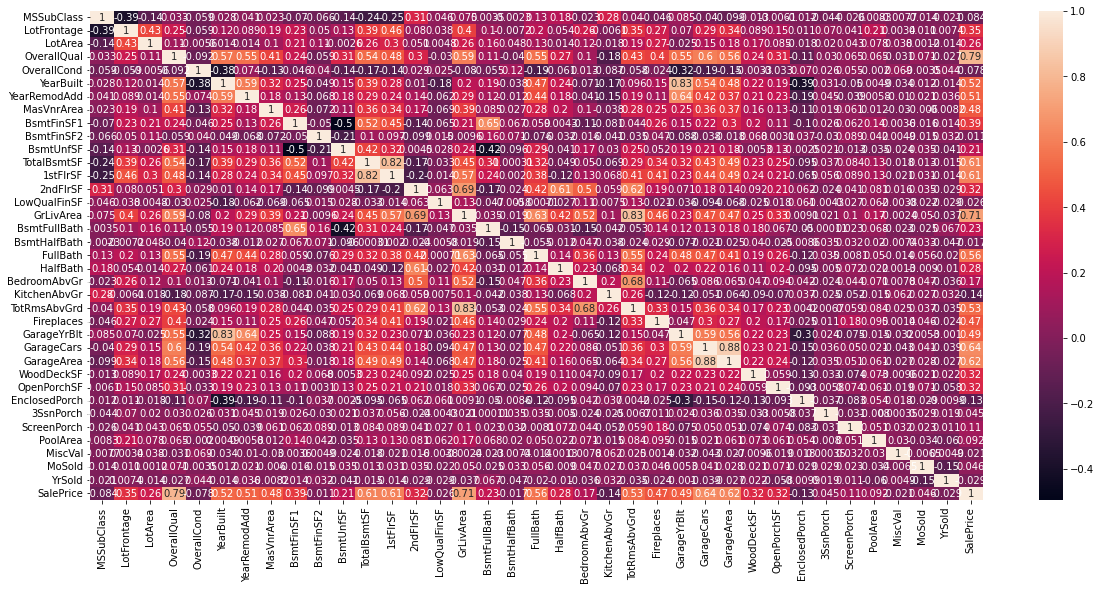

In [288]:
# Visualizamos la correlación de las características
corrmat = df.corr()
plt.figure(figsize=(20, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

### Separación de los precios y las características
No queremos aplicar ninguna transformación a los precios ('SalePrice'). Para evitarlo, simplemente creamos una serie separada con los precios y eliminamos esa columna del conjunto de datos de las características.

In [5]:
caracteristicas = df.drop('SalePrice',axis =1)
precio = df['SalePrice'].copy()

# Feature Engenering

## Tratamiento de atributos categóricos y numéricos
La forma en que manejamos los datos categóricos es diferente de las características numéricas. Así que vamos a separar las características categoricas y numéricas

In [11]:
caracteristicas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
# Seleccionamos los atributos categóricos
categorical_features = caracteristicas.select_dtypes(include=['object']).columns
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [7]:
# Seleccionamos los atributos numéricos
numerical_features = caracteristicas.select_dtypes(exclude = ["object"]).columns

In [298]:
numerical_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [8]:
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))

# Tomamos los atributos categóricos y numéricos del dataframe caracteristicas
caract_num = caracteristicas[numerical_features]
caract_cat = caracteristicas[categorical_features]

Numerical features : 36
Categorical features : 43


## Valores faltantes
llenamos los valores que faltan para las características numéricas utilizando la mediana como reemplazo


In [9]:
print("NAs for numerical features in train : " + str(caract_num.isnull().values.sum()))

NAs for numerical features in train : 348


In [10]:
caract_num = caract_num.fillna(caract_num.median())
print("Remaining NAs for numerical features in train : " + str(caract_num.isnull().values.sum()))

Remaining NAs for numerical features in train : 0


Creamos caracteristicas dummies para los valores categ'oricos utilizando one-hot encoding

In [11]:
caract_cat.shape

(1460, 43)

In [12]:
caract_cat = pd.get_dummies(caract_cat)
caract_cat.shape

(1460, 252)

In [21]:
# Comprobamos
caract_cat.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [13]:
str(caract_cat.isnull().values.sum())

'0'

## Correlacion
Ahora que tenemos las nuevas variables vamos a comprobar la correlaci'on de todas las caracteristicas y vamos a descartar aquellas con una correlaci'on muy baja

In [14]:
#Unimos todas las caracteristicas y el precio
union_caract = pd.concat([caract_cat,caract_num],axis=1)
union_precio = pd.concat([union_caract,precio],axis=1)
union_precio.shape

(1460, 289)

In [15]:
#matriz de correlacion
corrmat = union_precio.corr()
corrmat

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSZoning_C (all),1.000000,-0.017926,-0.008742,-0.160278,-0.034792,0.254287,-0.254287,-0.015638,0.086418,-0.040840,...,-0.055969,0.022243,0.082295,-0.009661,-0.007689,-0.005705,0.002999,0.042344,0.030290,-0.111257
MSZoning_FV,-0.017926,1.000000,-0.022722,-0.416608,-0.090435,-0.013866,0.013866,-0.040649,0.445741,-0.081464,...,-0.063687,0.185169,-0.077563,-0.025113,-0.046530,-0.014828,-0.018928,-0.003594,0.004943,0.089950
MSZoning_RH,-0.008742,-0.022722,1.000000,-0.203158,-0.044101,-0.006762,0.006762,-0.019822,0.061752,-0.046176,...,-0.022364,-0.029259,0.063286,-0.012246,-0.028443,-0.007231,-0.009230,0.045883,-0.025035,-0.065429
MSZoning_RL,-0.160278,-0.416608,-0.203158,1.000000,-0.808585,-0.045348,0.045348,-0.234358,-0.267166,0.261574,...,0.167734,-0.044253,-0.159896,0.051525,0.061666,0.035591,0.016581,-0.003429,0.012716,0.245063
MSZoning_RM,-0.034792,-0.090435,-0.044101,-0.808585,1.000000,0.003127,-0.003127,0.301534,0.010214,-0.229711,...,-0.135901,-0.053039,0.190614,-0.038708,-0.033662,-0.028779,-0.006047,-0.017192,-0.017131,-0.288065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PoolArea,-0.005705,-0.014828,-0.007231,0.035591,-0.028779,-0.004413,0.004413,-0.012935,-0.011676,0.017269,...,0.073378,0.060762,0.054203,-0.007992,0.051307,1.000000,0.029669,-0.033737,-0.059689,0.092404
MiscVal,0.002999,-0.018928,-0.009230,0.016581,-0.006047,0.022733,-0.022733,0.005510,-0.014905,0.043950,...,-0.009551,-0.018584,0.018361,0.000354,0.031946,0.029669,1.000000,-0.006495,0.004906,-0.021190
MoSold,0.042344,-0.003594,0.045883,-0.003429,-0.017192,-0.003690,0.003690,-0.004314,-0.021780,0.032942,...,0.021011,0.071255,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,0.046432
YrSold,0.030290,0.004943,-0.025035,0.012716,-0.017131,0.025043,-0.025043,-0.022092,-0.001392,-0.035973,...,0.022270,-0.057619,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.028923


Vamos a crear una lista con los nombres de aquellas caracteristicas que tengan una correlacion con valor absoluto igual o mayor que 0.1

In [16]:
# caracteristicas mas correlacionadas
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>=0.1]

In [311]:
# most correlated features
#top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>=0.1]
#plt.figure(figsize=(15,10))
#g = sns.heatmap(union_precio[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [26]:
top_corr_features

Index(['MSZoning_C (all)', 'MSZoning_RL', 'MSZoning_RM', 'Alley_Grvl',
       'LotShape_IR1', 'LotShape_IR2', 'LotShape_Reg', 'LandContour_Bnk',
       'LandContour_HLS', 'LotConfig_CulDSac',
       ...
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
       'SalePrice'],
      dtype='object', length=134)

In [28]:
len(top_corr_features)

134

Ahora tomamos esas caracteristicas desde el df union_caract

In [29]:
top_corr_features.drop('SalePrice')

Index(['MSZoning_C (all)', 'MSZoning_RL', 'MSZoning_RM', 'Alley_Grvl',
       'LotShape_IR1', 'LotShape_IR2', 'LotShape_Reg', 'LandContour_Bnk',
       'LandContour_HLS', 'LotConfig_CulDSac',
       ...
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch'],
      dtype='object', length=133)

In [17]:
final = union_caract[top_corr_features.drop('SalePrice')]

# Division del conjunto de datos

Separamos nuestro conjunto de datos final en un conjunto de entrenamiento y un conjunto de prueba

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# División del conjunto de datos
X_train,X_test,y_train,y_test = train_test_split(final,precio,test_size = 0.3,random_state= 0)

In [20]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1022, 133), (438, 133), (1022,), (438,))

In [34]:
X_train.head(3)

,MSZoning_C (all),MSZoning_RL,MSZoning_RM,Alley_Grvl,LotShape_IR1,LotShape_IR2,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LotConfig_CulDSac,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
64,0,1,0,0,0,0,1,0,0,0,...,1,8,0,1998.0,2,645,576,36,0,0
682,0,1,0,0,0,0,1,0,1,0,...,1,6,1,1996.0,2,431,307,0,0,0
960,0,1,0,0,1,0,0,0,0,0,...,1,4,0,1980.0,0,0,117,0,0,0


Estandarizamos la escala de los datos

In [21]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train)
X_test = s_scaler.transform(X_test)

In [44]:
X_train

array([[-0.09425763,  0.49785866, -0.40170093, ..., -0.16833375,
        -0.36746664, -0.2783654 ],
       [-0.09425763,  0.49785866, -0.40170093, ..., -0.70091053,
        -0.36746664, -0.2783654 ],
       [-0.09425763,  0.49785866, -0.40170093, ..., -0.70091053,
        -0.36746664, -0.2783654 ],
       ...,
       [-0.09425763, -2.00860219,  2.48941421, ..., -0.70091053,
        -0.36746664, -0.2783654 ],
       [-0.09425763,  0.49785866, -0.40170093, ..., -0.40503454,
        -0.36746664, -0.2783654 ],
       [-0.09425763,  0.49785866, -0.40170093, ...,  0.49738722,
        -0.36746664, -0.2783654 ]])

# Regresión lineal
Utilizaremos el modelo de regresión lineal para predecir los precios

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

Veamos algunas predicciones y evaluamos el modelo

In [23]:
y_predd = lin_reg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predd})
df1 = df.head(10)
df1

,Actual,Predicted
529,200624,228010.651733
491,133000,140423.861388
459,110000,115797.557895
279,192000,222373.439944
655,88000,103602.903444
1013,85000,85690.663429
1403,282922,246355.235761
601,141000,126798.318181
1182,745000,437359.034773
687,148800,167828.422559


In [24]:
df.sort_values(by='Predicted')

,Actual,Predicted
1337,52500,43736.831302
29,68500,52974.400203
107,115000,55578.975366
1090,92900,63027.930576
1000,82000,63822.775190
...,...,...
440,555000,442646.664670
769,538000,454998.610858
898,611657,455978.689837
58,438780,461144.384079


C:\Users\MH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

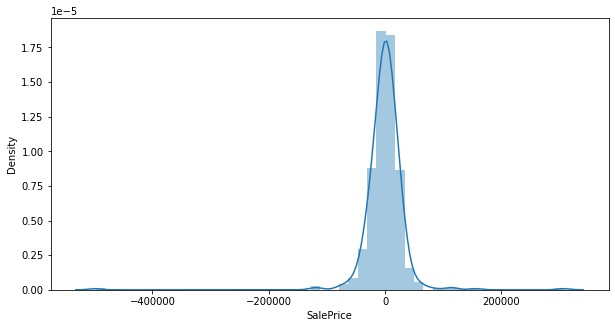

In [27]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_predd)
sns.distplot(residuals)

Se utilizará para evaluar el desempeño del/los modelo/s la raíz cuadrada del error logarítmico medio, (RMSLE) por sus siglas en inglés.

$$ RMSLE=\sqrt{\frac{1}{n}\sum_{i=1}^n(\log (p_i + 1)-\log (a_i+1))^2}$$

siendo $p_i$ el valor predicho y $a_i$ el actual.

In [28]:
# error cuadratico medio
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_test, y_predd)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

37478.08534455809

In [30]:
# RMSLE
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test, y_predd, squared=False)

0.15614616990628716